### Step 1: Acquire the data and create our environment

In [2]:
import pandas as pd
import numpy as np
#import pandas to read csv files

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#pd.read_csv() method creates a dataframe from a csv file. 

In [4]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
""""
.shape shows the size of the data
train has 81 columns while test has 80 columns. 


"""

Train data shape: (1460, 81)
Test data shape: (1459, 80)


'"\n.shape shows the size of the data\ntrain has 81 columns while test has 80 columns. \n\n\n'

In [5]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


"""
Brief descriptions of below headings:
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.
MSSubClass — The building class
MSZoning — The general zoning classification
LotFrontage — Linear feet of street connected to property
LotArea — Lot size in square feet
Street — Type of road access
Alley — Type of alley access
LotShape — General shape of property
LandContour — Flatness of the property
Utilities — Type of utilities available
LotConfig — Lot configuration
"""

In [6]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)
#import matplotlib to visualize data with plotted graph. 
#Plotting allows visualize data, check for outliers, and see patterns

### Step 2: Explore the data and engineer features

In [7]:
train.SalePrice.describe()
#

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


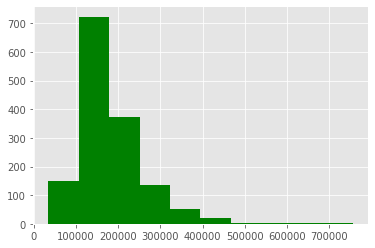

In [8]:
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color = 'green')
plt.show()

Skew is: 0.12133506220520406


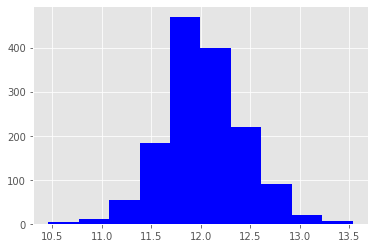

In [9]:
target = np.log(train.SalePrice) #np.log() to transform train.SalePrice to a normal distribution
print("Skew is:", target.skew())
plt.hist(target, color = 'blue')
plt.show()

### Working with numeric features 

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes
#.select_dtypes method returns a subset of columns matching the specified data types


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending = False)[:5], '\n')
print(corr['SalePrice'].sort_values(ascending = False)[-5:])
#dataframe.corr() method displays the correlation (relationship) between the columns
#we examined the correlations between the features and target.

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Below five features are positively correlated with salePrice:
SalePrice: House sale price
OverallQual: overall quality(Rates the overall material and finish of the house), 
GrLivArea: ground living area (Above grade (ground) living area square feet),
GarageCars: Size of garage in car capacity,
GarageArea: Size of garage in square feet.

Below five features are negatively correlated with salePrice:
YrSold: Year Sold (YYYY)
OverallCond: Rates the overall condition of the house
MSSubClass: Identifies the type of dwelling involved in the sale.
EnclosedPorch: Enclosed porch area in square feet
KitchenAbvGr: Kitchens above grade.


In [12]:
train.OverallQual.unique() #OverallQual data is in range of 1 to 10. 

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [13]:
quality_pivot = train.pivot_table(index='OverallQual', values= 'SalePrice', aggfunc=np.median)
#create a pivot table to see the relationship between overallqual and saleprice. 

In [14]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


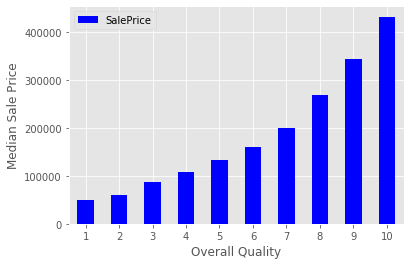

In [15]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

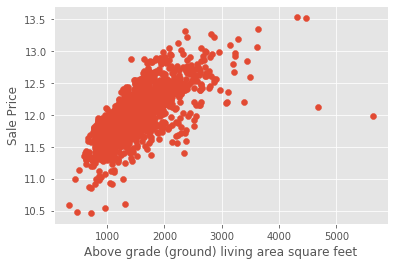

In [16]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()
#the sale price increases as living area increases

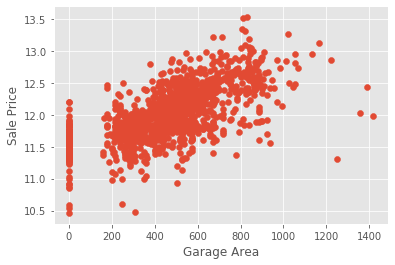

In [17]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()
#many homes start with 0 garage. sale price increases as garage area increases. 

In [18]:
train = train[train['GarageArea'] < 1200]
#create a new dataframe to remove outliers

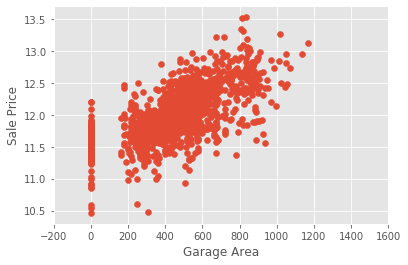

In [19]:
plt.scatter(x=train['GarageArea'], y =np.log(train.SalePrice))
plt.xlim(-200,1600) #this forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [20]:
#create a DataFrame to view the top null columns.
nulls= pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25]) 
nulls.columns= ['Null Count']#count the series of null values in each column.
nulls.index.name = 'Feature'
nulls 

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [21]:
print("Unique values are:", train.MiscFeature.unique())
#return unique values in miscfeature column.
"""
MiscFeature: Miscellaneous feature not covered in other categories

   Elev Elevator
   Gar2 2nd Garage (if not described in garage section)
   Othr Other
   Shed Shed (over 100 SF)
   TenC Tennis Court
   NA   None
"""

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


'\nMiscFeature: Miscellaneous feature not covered in other categories\n\n   Elev Elevator\n   Gar2 2nd Garage (if not described in garage section)\n   Othr Other\n   Shed Shed (over 100 SF)\n   TenC Tennis Court\n   NA   None\n'

In [22]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
#count shows the number of non-null values
#unique counts the number of unique values
#top is the most commonly occurring value
#frequency counts the top values

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


### Transforming and engineering features 

In [23]:
#transformation should be applied to training data before fitting the model must be applied to the test data.


In [24]:
print("Original: \n")
print(train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [25]:
#create a new column called enc_Street. Do the pd.get_dummies() method on both train and test. 
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [26]:
print('Encode: \n')
print(train.enc_street.value_counts())

Encode: 

1    1450
0       5
Name: enc_street, dtype: int64


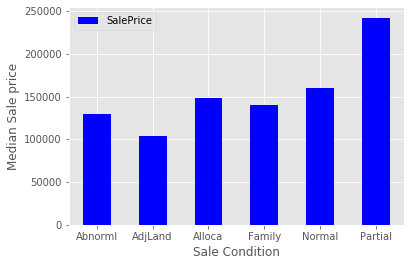

In [27]:
condition_pivot = train.pivot_table(index='SaleCondition', values = 'SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale price')
plt.xticks(rotation=0)
plt.show()
#partial has the highest median sale price. 

In [28]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

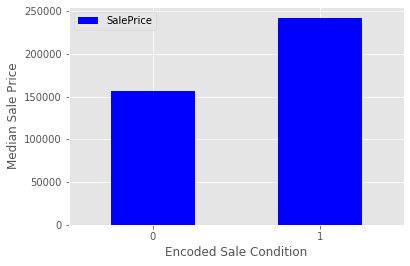

In [29]:
condition_pivot = train.pivot_table(index='enc_condition', values ='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [30]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [31]:
sum(data.isnull().sum() != 0)
#check columns with 0 null valeus

0

### Step3: Build a linear model 

In [32]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis =1)
"""
train_test_split() returns four objects:

X_train is the subset of our features used for training.
X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
y_train is the target variable SalePrice which corresponds to X_train.
y_test is the target variable SalePrice which corresponds to X_test.
"""

'\ntrain_test_split() returns four objects:\n\nX_train is the subset of our features used for training.\nX_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.\ny_train is the target variable SalePrice which corresponds to X_train.\ny_test is the target variable SalePrice which corresponds to X_test.\n'

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

### Begin modeling 

In [34]:
#create linear regression model.
#instantiate the model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [35]:
model = lr.fit(X_train, y_train)

### Evaluate the performance and visualize results 

The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

In [36]:
print("R^2 is: \n", model.score(X_test, y_test))
#model.score() returns r-squared value. 89% of the variance in our target variable.

R^2 is: 
 0.8882477709262531


In [37]:
predictions= model.predict(X_test)
#model.predict() returns a list of predictions given a set of predictors.
#Use model.predict() after fitting the model

In [38]:
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.01784179451956794


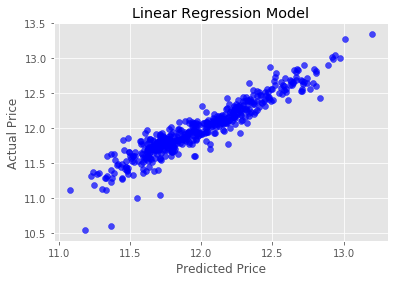

In [39]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color = 'b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()
#predicted values are identical to the actual values, the graph is y=x.

### Try to improve the model 

Ridge regularization to decrease influence of less important features. Ridge regularization process shrinks the regression coefficients of less important features


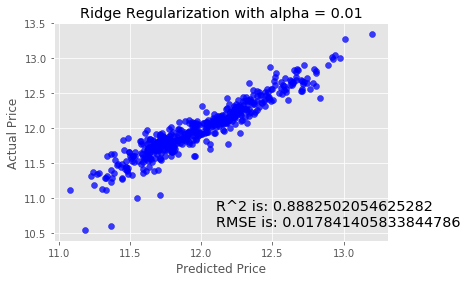

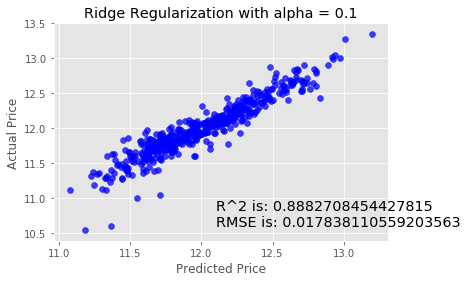

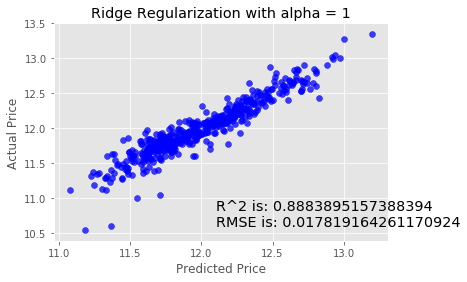

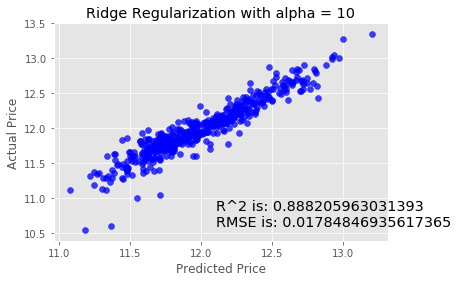

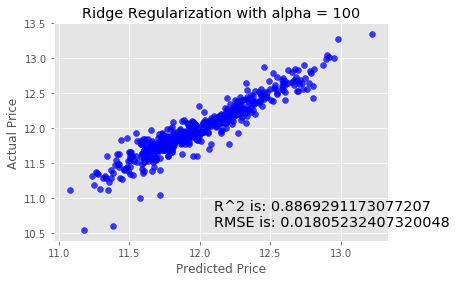

In [40]:
for i in range(-2,3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')
    plt.show()
    
    #all models show almost identical to the first model. In this case, adjusting alpha didn't improve much in our model. 

### Step4: Make a submission 

In [41]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [42]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [43]:
predictions = model.predict(feats)

In [44]:
final_predictions = np.exp(predictions)

In [45]:
print("Original predictions are: \n", predictions[:5], "\n")
print("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are: 
 [128959.49172585 122920.74024358 175704.82598102 200050.83263755
 182075.46986405]


In [46]:
submission['SalePrice']= final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [47]:
submission.to_csv('submission1.csv', index= False)